<a href="https://colab.research.google.com/github/SharvariCodes/Machine-Learning-Algorithms/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='light blue'> **Linear Regression from Scratch**

# <font color='gree'> **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# <font color='gree'> **Loading the Data**

In [ ]:
data = pd.read_csv('data_for_lr.csv')

In [ ]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# <font color='gree'> **Data Preprocessing**



In [ ]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [ ]:
data.isnull().sum()

,0
x,0
y,1


In [ ]:
data= data.dropna()
print("Shape of the data: ", data.shape)

Shape of the data:  (699, 2)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


# <font color='gree'> **Splitting the Data**

In [ ]:
# train data
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# test data
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [ ]:
print(f"Training data shape: {train_input.shape}, {train_output.shape}")
print(f"Testing data shape: {test_input.shape}, {test_output.shape}")

Training data shape: (500, 1), (500, 1)
Testing data shape: (199, 1), (199, 1)


# <font color='gree'> **Linear Regression**

### **1. Forward Propagation**

In [ ]:
def forward_propogation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]

    predictions = np.multiply(m, train_input) + c

    return predictions

### **2. Cost Function**

In [ ]:
def cost_func(predictions, train_output):
    cost = np.mean((train_output - predictions)**2) * 0.5

    return cost

### **3. Backward Propagation**

In [ ]:
def backward_propogation(train_input, train_output, predictions):
    derivatives = dict()

    df = predictions - train_input
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives["dm"] = dm
    derivatives["dc"] = dc

    return derivatives

### **4. Updating the Parameters**

In [ ]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]

    return parameters

### **5. Training the Data**

In [ ]:
def train(train_input, train_output, learning_rate, iters):
    # random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1

    plt.figure()

    # loss
    loss = list()

    # gradient descent
    for i in range(iters):

        # forward propogation
        predictions = forward_propogation(train_input, parameters)

        # cost
        cost = cost_func(predictions, train_output)
        loss.append(cost)
        print(f"Iteration = {i+1}, loss = {loss}")
        # plot
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, "+", label = 'Original')
        ax.plot(train_input, predictions, "+", label = 'Training')
        legend = ax.legend()
        plt.plot(train_input, train_output, "+", label = 'Original')
        plt.plot(train_input, predictions, "+", label = 'Training')
        plt.show()

        # backward propogation
        derivatives = backward_propogation(train_input, train_output, predictions)

        # update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)

    return parameters, loss

Iteration = 1, loss = [2634.4198573363833]


<Figure size 640x480 with 0 Axes>

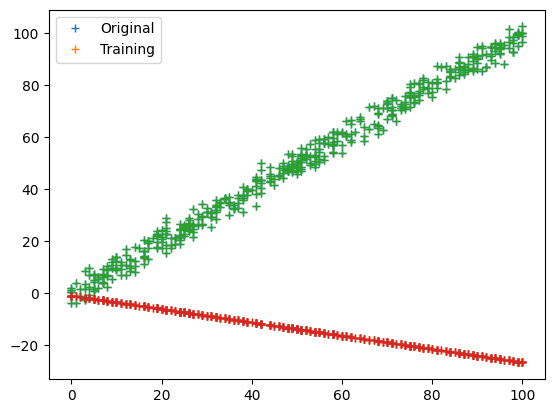

Iteration = 2, loss = [2634.4198573363833, 1195.0675713700634]


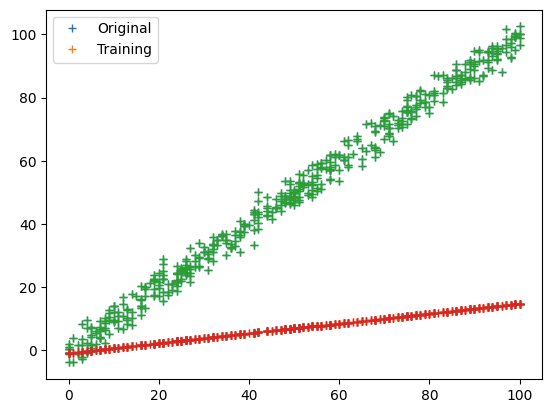

Iteration = 3, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221]


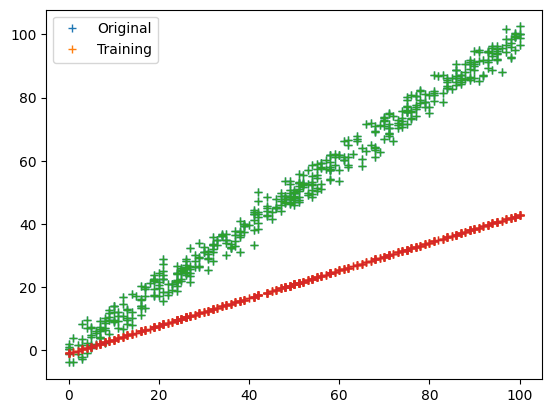

Iteration = 4, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572]


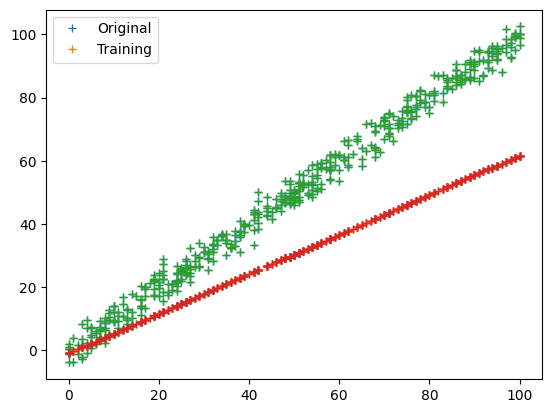

Iteration = 5, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932]


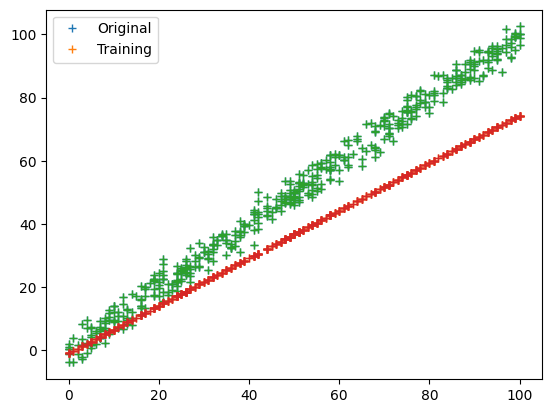

Iteration = 6, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847]


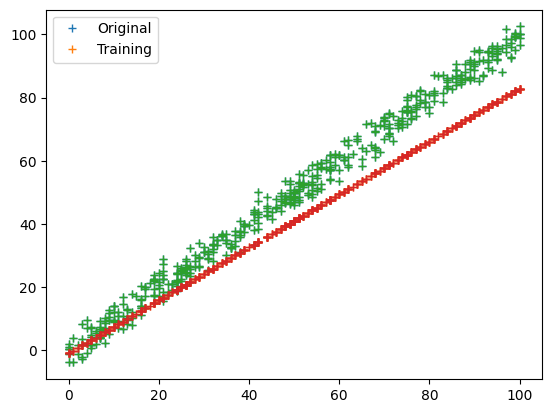

Iteration = 7, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743]


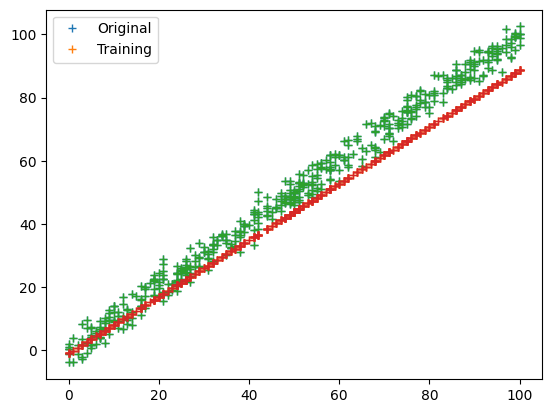

Iteration = 8, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308]


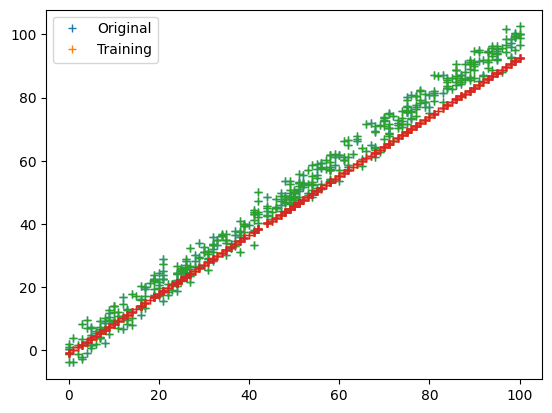

Iteration = 9, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784]


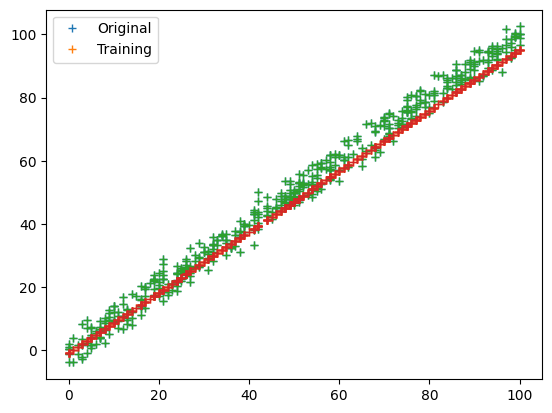

Iteration = 10, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686]


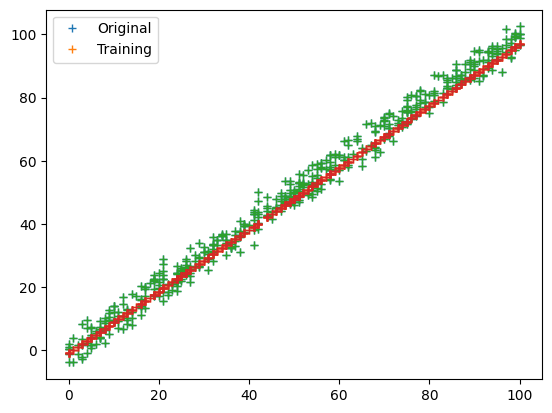

Iteration = 11, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402]


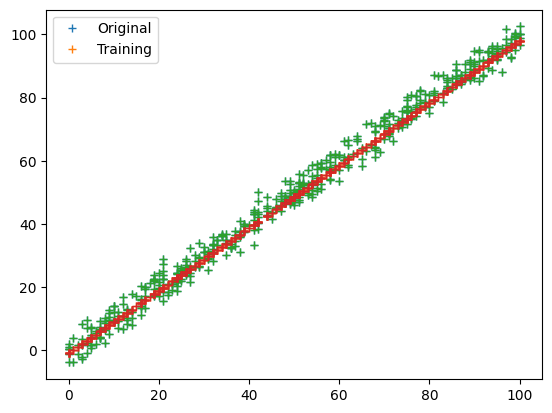

Iteration = 12, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586]


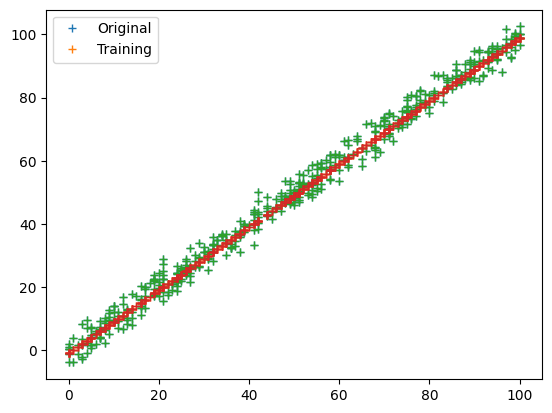

Iteration = 13, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838]


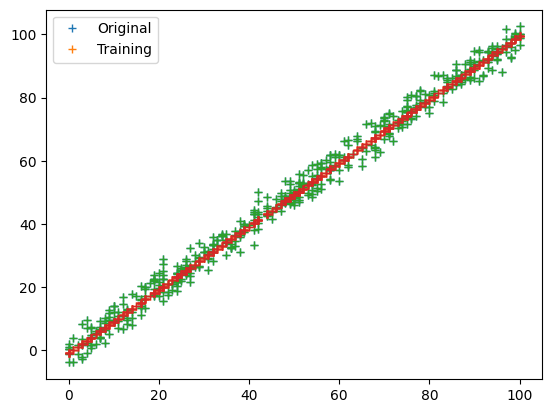

Iteration = 14, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838, 4.016387763982581]


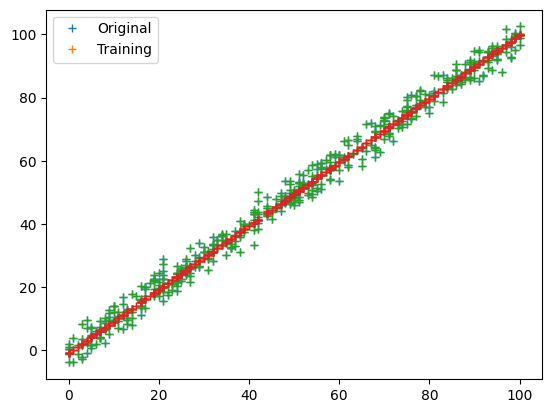

Iteration = 15, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838, 4.016387763982581, 3.9870832470137794]


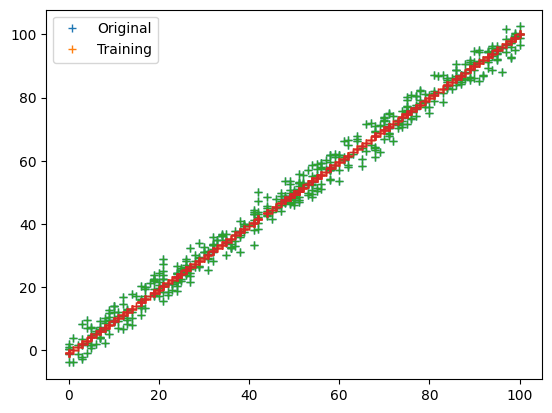

Iteration = 16, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838, 4.016387763982581, 3.9870832470137794, 3.9782926188145895]


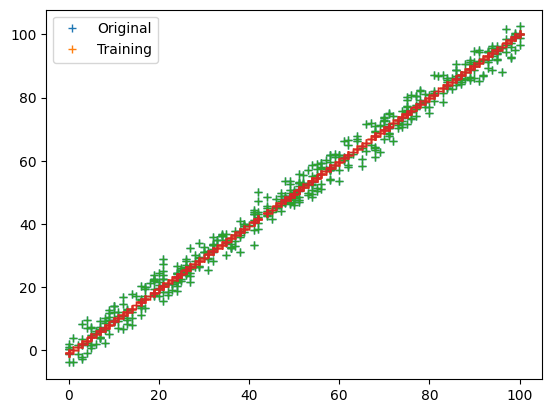

Iteration = 17, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838, 4.016387763982581, 3.9870832470137794, 3.9782926188145895, 3.9773378624588887]


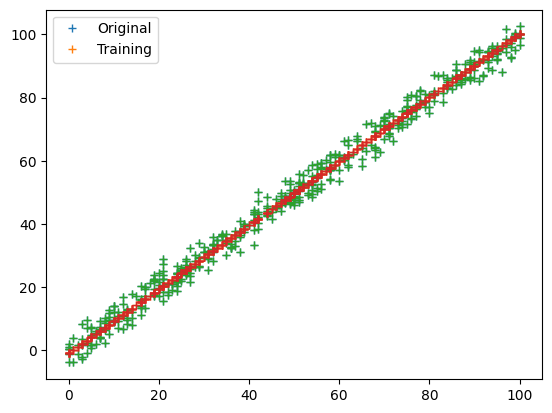

Iteration = 18, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838, 4.016387763982581, 3.9870832470137794, 3.9782926188145895, 3.9773378624588887, 3.9789472198693523]


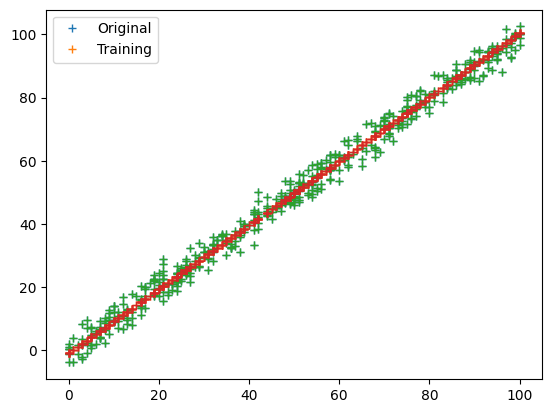

Iteration = 19, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838, 4.016387763982581, 3.9870832470137794, 3.9782926188145895, 3.9773378624588887, 3.9789472198693523, 3.9810523871696515]


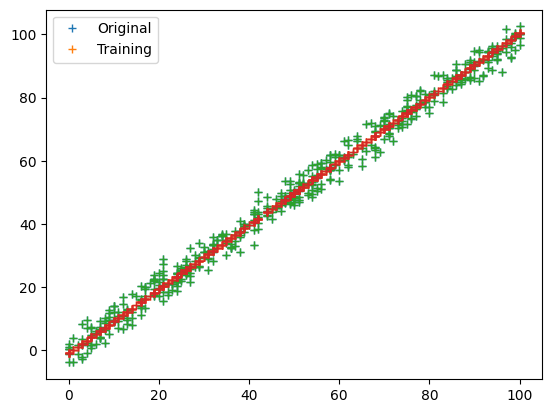

Iteration = 20, loss = [2634.4198573363833, 1195.0675713700634, 542.7990492529221, 247.3808659001572, 113.69738901045932, 53.27950417878847, 26.025765911916743, 13.767086609351308, 8.276958741875784, 5.83434138190686, 4.758628857909402, 4.292471058659586, 4.095721280238838, 4.016387763982581, 3.9870832470137794, 3.9782926188145895, 3.9773378624588887, 3.9789472198693523, 3.9810523871696515, 3.982932872649559]


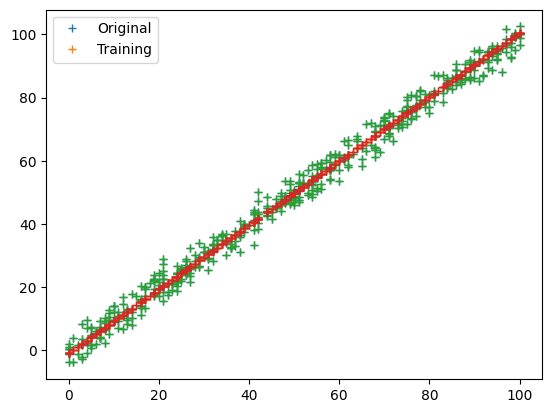

In [ ]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [ ]:
print(parameters)

{'m': 1.0141312747768907, 'c': -0.9643479916779794}


In [ ]:
loss

[2634.4198573363833,
 1195.0675713700634,
 542.7990492529221,
 247.3808659001572,
 113.69738901045932,
 53.27950417878847,
 26.025765911916743,
 13.767086609351308,
 8.276958741875784,
 5.83434138190686,
 4.758628857909402,
 4.292471058659586,
 4.095721280238838,
 4.016387763982581,
 3.9870832470137794,
 3.9782926188145895,
 3.9773378624588887,
 3.9789472198693523,
 3.9810523871696515,
 3.982932872649559]

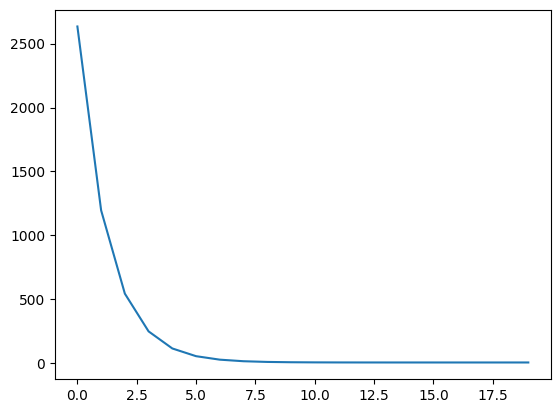

In [ ]:
plt.plot(loss)

### **6. Testing / Predicting**

In [ ]:
test_predictions = test_input * parameters['m'] + parameters['c']

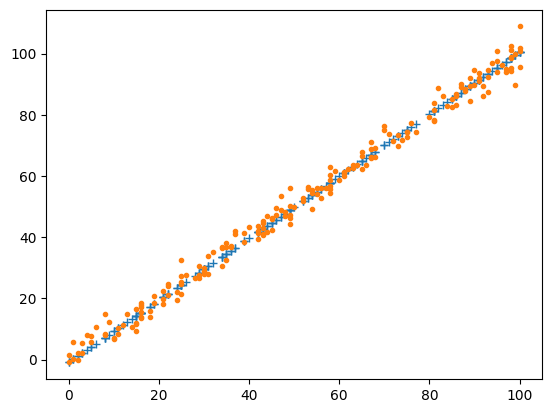

In [ ]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")
plt.show()

In [ ]:
cost_func(test_output, test_predictions)

4.132787083718098

In [ ]:
print("Namaskar, World!")

Namaskar, World!
